In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import openpyxl

In [3]:
plt.style.use('fivethirtyeight')
sns.set_palette("viridis")
sns.set_context("notebook", font_scale=1.2)

In [11]:
file_path = '/home/brishti/sportsanalysis/Sports Analysis dataset.xlsx'
data = pd.read_excel(file_path, sheet_name=0)
data_as_lists = data.values.tolist()
headers = data.columns.tolist()
print("Headers:", headers)
#print("First few rows:", data_as_lists[:3])  

Headers: ['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply', 'unique opening_name', 'no. of times it was played', 'no. of times white won', 'no. of times black won', 'no. of times it was a draw']


In [13]:
fig = plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

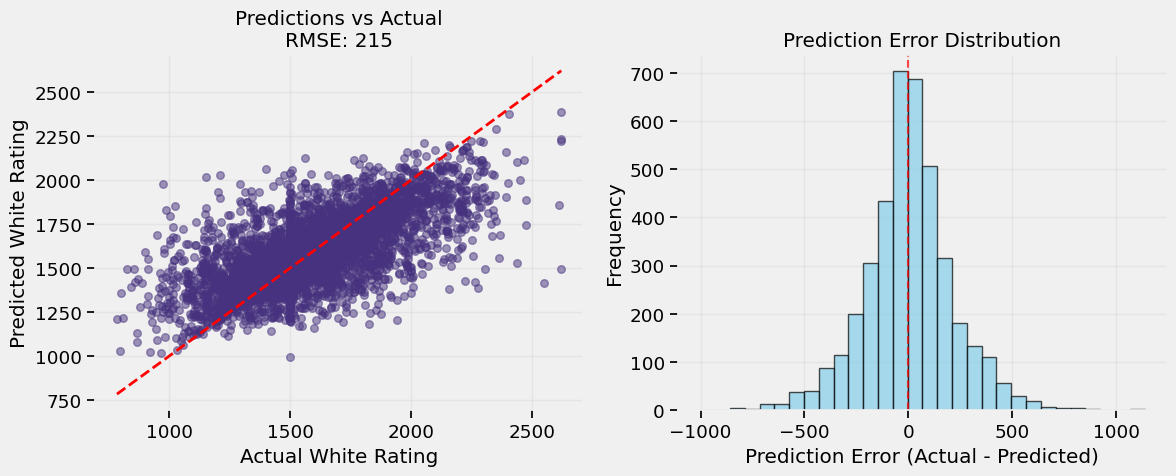

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual White Rating')
plt.ylabel('Predicted White Rating')
plt.title(f'Predictions vs Actual\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
errors = y_test - y_pred
plt.hist(errors, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.axvline(0, color='red', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

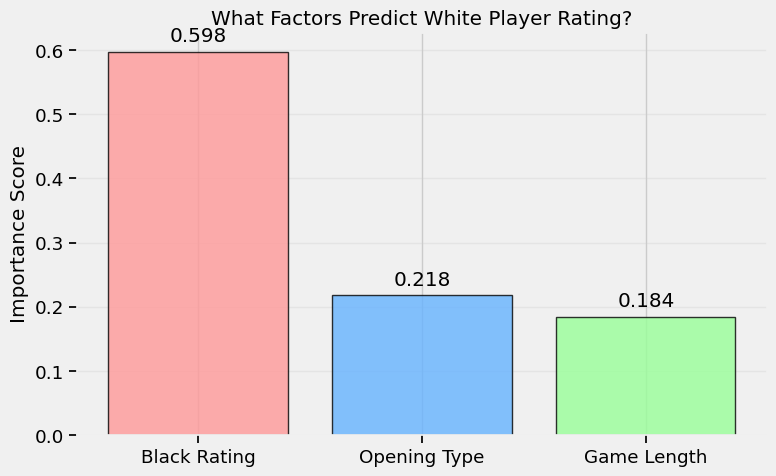

In [18]:
plt.figure(figsize=(8, 5))
feature_names = ['Black Rating', 'Opening Type', 'Game Length']
importances = rf.feature_importances_
colors = ['#ff9999', '#66b3ff', '#99ff99']

bars = plt.bar(feature_names, importances, color=colors, alpha=0.8, edgecolor='black')
plt.title('What Factors Predict White Player Rating?')
plt.ylabel('Importance Score')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

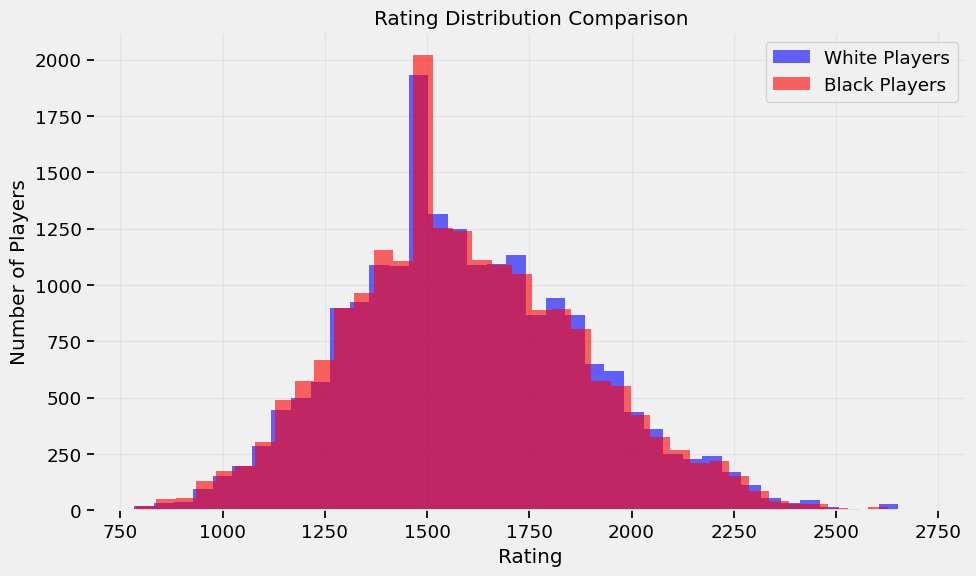

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data['white_rating'], alpha=0.6, label='White Players', bins=40, color='blue')
plt.hist(data['black_rating'], alpha=0.6, label='Black Players', bins=40, color='red')
plt.xlabel('Rating')
plt.ylabel('Number of Players')
plt.title('Rating Distribution Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

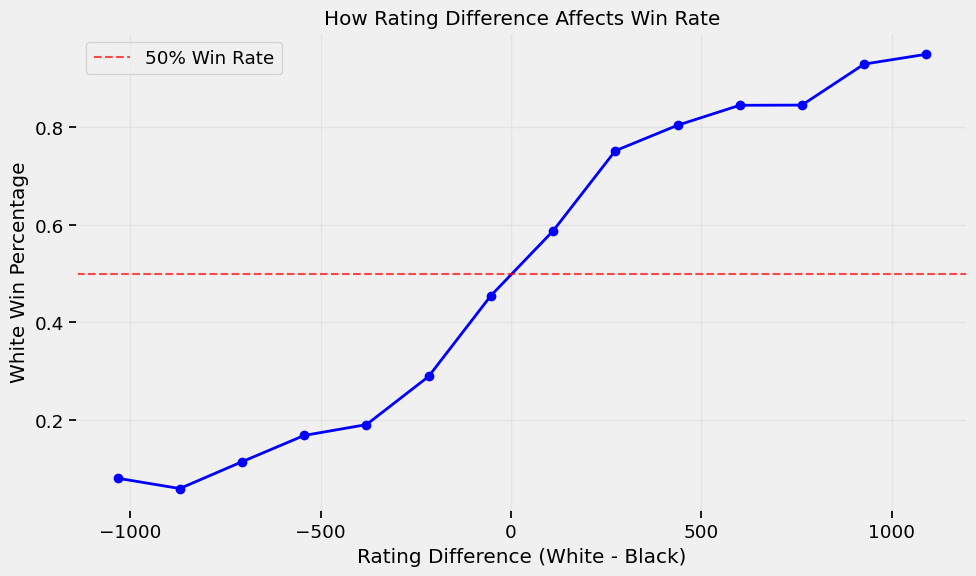

In [21]:
plt.figure(figsize=(10, 6))
data['rating_diff'] = data['white_rating'] - data['black_rating']

# Create bins for rating difference
bins = np.linspace(data['rating_diff'].min(), data['rating_diff'].max(), 20)
bin_centers = (bins[:-1] + bins[1:]) / 2
win_rates = []

for i in range(len(bins)-1):
    mask = (data['rating_diff'] >= bins[i]) & (data['rating_diff'] < bins[i+1])
    if mask.sum() > 10:  # Only include bins with enough data
        win_rate = (data[mask]['winner'] == 'white').mean()
        win_rates.append(win_rate)
    else:
        win_rates.append(np.nan)

# Remove NaN values
valid_indices = ~np.isnan(win_rates)
plt.plot(bin_centers[valid_indices], np.array(win_rates)[valid_indices], 'bo-', linewidth=2, markersize=6)
plt.xlabel('Rating Difference (White - Black)')
plt.ylabel('White Win Percentage')
plt.title('How Rating Difference Affects Win Rate')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='50% Win Rate')
plt.legend()
plt.tight_layout()
plt.show()


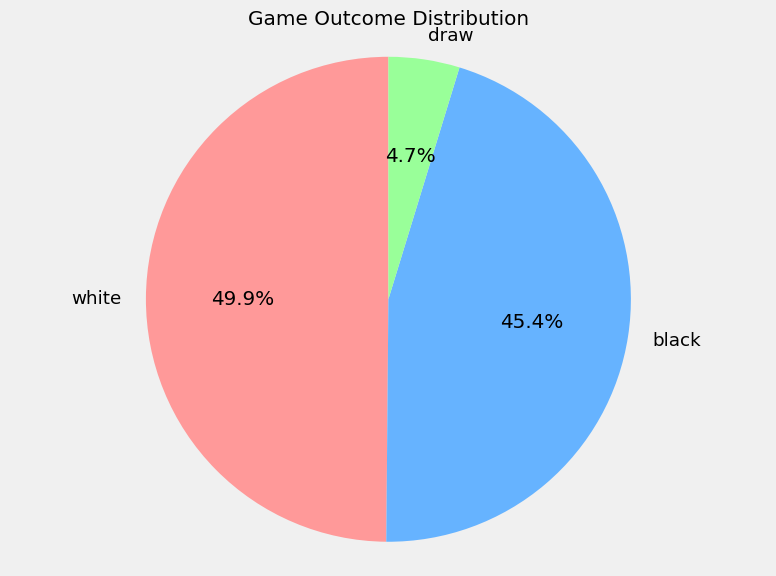

In [22]:
plt.figure(figsize=(8, 6))
outcome_counts = data['winner'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(outcome_counts.values, labels=outcome_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Game Outcome Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

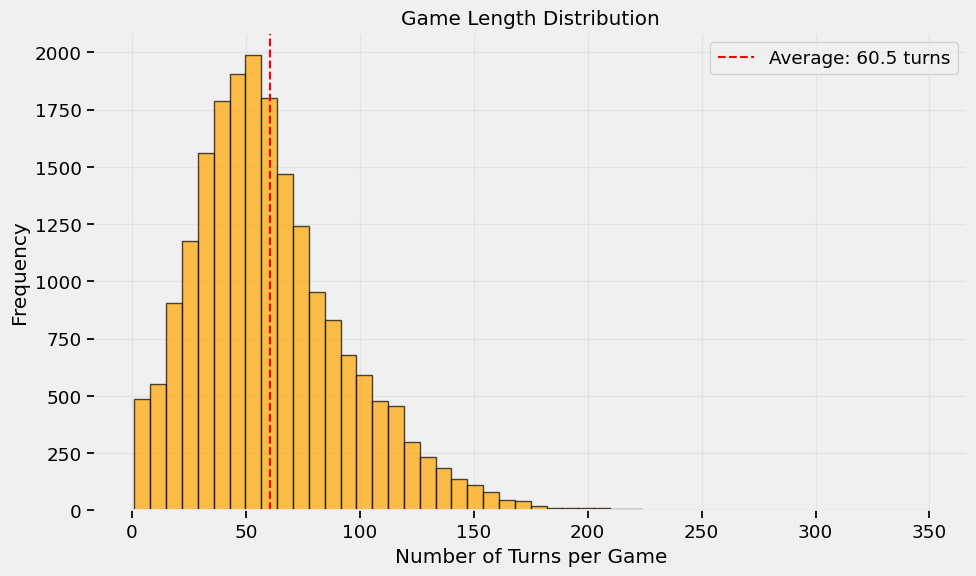

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(data['turns'], bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Number of Turns per Game')
plt.ylabel('Frequency')
plt.title('Game Length Distribution')
plt.axvline(data['turns'].mean(), color='red', linestyle='--', 
            label=f'Average: {data["turns"].mean():.1f} turns')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

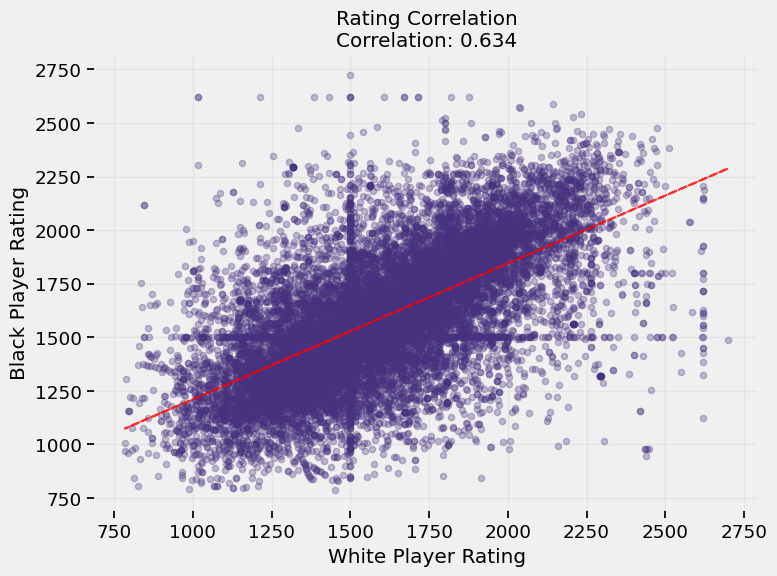

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(data['white_rating'], data['black_rating'], alpha=0.3, s=20)
plt.xlabel('White Player Rating')
plt.ylabel('Black Player Rating')
plt.title(f'Rating Correlation\nCorrelation: {np.corrcoef(data["white_rating"], data["black_rating"])[0,1]:.3f}')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(data['white_rating'], data['black_rating'], 1)
p = np.poly1d(z)
plt.plot(data['white_rating'], p(data['white_rating']), "r--", alpha=0.8)
plt.tight_layout()
plt.show()

In [27]:
print("="*50)
print("RATING PREDICTION MODEL SUMMARY")
print("="*50)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.1f} rating points")
print(f"R² Score: {r2_score(y_test, y_pred):.3f} (explains {r2_score(y_test, y_pred)*100:.1f}% of variance)")
print(f"Mean Absolute Error: {np.mean(np.abs(errors)):.1f} rating points")
print(f"Standard Deviation of Errors: {np.std(errors):.1f} rating points")
print()
print("INTERPRETATION:")
if r2_score(y_test, y_pred) > 0.7:
    print("✓ Excellent model performance")
elif r2_score(y_test, y_pred) > 0.5:
    print("✓ Good model performance") 
elif r2_score(y_test, y_pred) > 0.3:
    print("⚠ Moderate model performance - room for improvement")
else:
    print("⚠ Poor model performance - needs significant improvement")

print()
print("SUGGESTIONS TO IMPROVE:")
print("• Add player's recent game history")
print("• Include time control information")
print("• Add player's opening-specific performance")
print("• Consider player's rating trend over time")

RATING PREDICTION MODEL SUMMARY
RMSE: 214.7 rating points
R² Score: 0.445 (explains 44.5% of variance)
Mean Absolute Error: 158.1 rating points
Standard Deviation of Errors: 214.7 rating points

INTERPRETATION:
⚠ Moderate model performance - room for improvement

SUGGESTIONS TO IMPROVE:
• Add player's recent game history
• Include time control information
• Add player's opening-specific performance
• Consider player's rating trend over time


Simple Rating Prediction RMSE: 225.19
Correlation: 0.634

Top 5 improving players:
        player  games  start_rating  end_rating  rating_change  trend_slope
42     totonut     24          1778        1868             90     6.161304
27     kevchod     26          1425        1551            126     5.911111
41  sveenemand     24          1039        1264            225     4.628696
18      ozil17     30          1464        1562             98     3.313237
45     die_uhr     24          1792        1831             39     2.759130

Top 5 declining players:
        player  games  start_rating  end_rating  rating_change  trend_slope
38      traced     24          2347        1500           -847   -17.351739
39        mrjv     24          1617        1511           -106    -7.179130
37       unrim     25          1979        1830           -149    -6.420769
46     dadt505     24          1242        1181            -61    -4.198696
8   ozguragarr     38          1499        1404        

/tmp/ipykernel_11129/3702596871.py:126: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_by_diff = data.groupby(pd.cut(data['rating_diff'], bins=20))['actual_white_win'].mean()


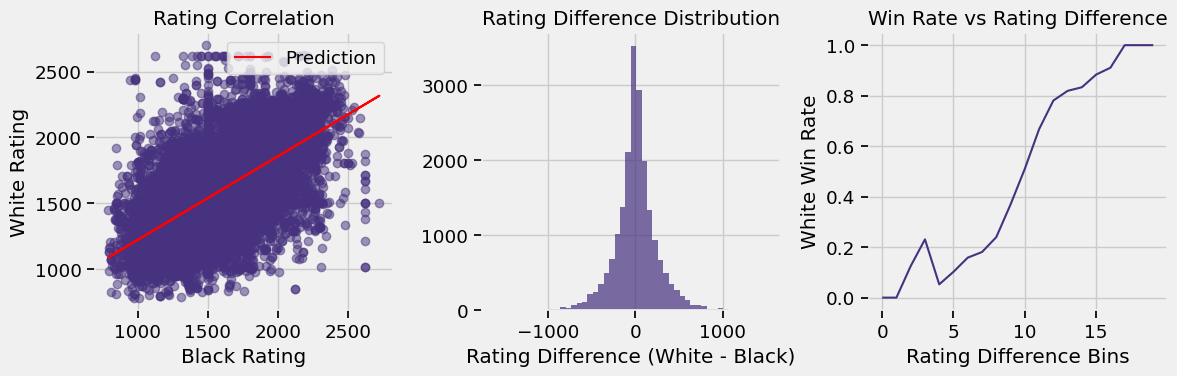

In [28]:
# Continue from your existing code

# 1. BASIC RATING PREDICTION (No sklearn needed)
import numpy as np

# Create basic features
data['rating_diff'] = data['white_rating'] - data['black_rating']
data['avg_rating'] = (data['white_rating'] + data['black_rating']) / 2

# Simple linear regression for rating prediction
def simple_linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate slope and intercept
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    intercept = y_mean - slope * x_mean
    
    return slope, intercept

# Predict white rating from black rating
slope, intercept = simple_linear_regression(data['black_rating'], data['white_rating'])
predicted_white = slope * data['black_rating'] + intercept
rmse = np.sqrt(np.mean((data['white_rating'] - predicted_white) ** 2))

print(f"Simple Rating Prediction RMSE: {rmse:.2f}")
print(f"Correlation: {np.corrcoef(data['white_rating'], data['black_rating'])[0,1]:.3f}")

# 2. RATING TRENDS ANALYSIS
def get_player_trends(data, player_col, rating_col, min_games=10):
    trends = []
    player_games = data[player_col].value_counts()
    
    for player in player_games[player_games >= min_games].index[:50]:  # Top 50 active players
        player_data = data[data[player_col] == player][rating_col].values
        if len(player_data) >= min_games:
            # Calculate trend using numpy
            x = np.arange(len(player_data))
            slope = np.polyfit(x, player_data, 1)[0]
            trends.append({
                'player': player,
                'games': len(player_data),
                'start_rating': player_data[0],
                'end_rating': player_data[-1],
                'rating_change': player_data[-1] - player_data[0],
                'trend_slope': slope
            })
    
    return pd.DataFrame(trends)

# Get trends for white players
white_trends = get_player_trends(data, 'white_id', 'white_rating')
if not white_trends.empty:
    print("\nTop 5 improving players:")
    print(white_trends.sort_values('trend_slope', ascending=False).head())
    
    print("\nTop 5 declining players:")
    print(white_trends.sort_values('trend_slope').head())

# 3. WIN PROBABILITY MODEL (Elo-based)
def calculate_win_probability(rating1, rating2):
    """Calculate expected win probability using Elo formula"""
    return 1 / (1 + 10**((rating2 - rating1) / 400))

data['expected_white_win'] = calculate_win_probability(data['white_rating'], data['black_rating'])
data['actual_white_win'] = (data['winner'] == 'white').astype(int)

# Compare expected vs actual
accuracy = np.mean((data['expected_white_win'] > 0.5) == data['actual_white_win'])
print(f"\nWin Prediction Accuracy: {accuracy:.3f}")

# 4. OPENING ANALYSIS
opening_performance = data.groupby('opening_name').agg({
    'white_rating': 'mean',
    'black_rating': 'mean', 
    'winner': lambda x: (x == 'white').mean(),
    'opening_name': 'count'
}).rename(columns={'opening_name': 'count', 'winner': 'white_win_rate'})

opening_performance = opening_performance[opening_performance['count'] >= 20]
print(f"\nBest openings for white (min 20 games):")
print(opening_performance.sort_values('white_win_rate', ascending=False).head())

# 5. RATING CHANGE PREDICTION
def predict_rating_change(current_rating, opponent_rating, win_result, k_factor=32):
    """Predict rating change based on Elo system"""
    expected = calculate_win_probability(current_rating, opponent_rating)
    if win_result == 'win':
        actual = 1
    elif win_result == 'draw':
        actual = 0.5
    else:
        actual = 0
    return k_factor * (actual - expected)

# Example usage
print(f"\nRating Change Examples:")
print(f"1500 vs 1600, win: +{predict_rating_change(1500, 1600, 'win'):.1f}")
print(f"1500 vs 1600, loss: {predict_rating_change(1500, 1600, 'loss'):.1f}")
print(f"1600 vs 1500, win: +{predict_rating_change(1600, 1500, 'win'):.1f}")

# 6. RATING DISTRIBUTION ANALYSIS
print(f"\nRating Statistics:")
print(f"White rating - Mean: {data['white_rating'].mean():.0f}, Std: {data['white_rating'].std():.0f}")
print(f"Black rating - Mean: {data['black_rating'].mean():.0f}, Std: {data['black_rating'].std():.0f}")
print(f"Rating difference - Mean: {data['rating_diff'].mean():.1f}")

# Plot rating trends if you want
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(data['black_rating'], data['white_rating'], alpha=0.5)
plt.plot(data['black_rating'], predicted_white, 'r-', label='Prediction')
plt.xlabel('Black Rating')
plt.ylabel('White Rating')
plt.title('Rating Correlation')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(data['rating_diff'], bins=50, alpha=0.7)
plt.xlabel('Rating Difference (White - Black)')
plt.title('Rating Difference Distribution')

plt.subplot(1, 3, 3)
win_by_diff = data.groupby(pd.cut(data['rating_diff'], bins=20))['actual_white_win'].mean()
plt.plot(range(len(win_by_diff)), win_by_diff.values)
plt.xlabel('Rating Difference Bins')
plt.ylabel('White Win Rate')
plt.title('Win Rate vs Rating Difference')

plt.tight_layout()
plt.show()